In [1]:
from CubeGen.tools.cubegen import map_ifu
from CubeGen.tools.mapgen import gen_map
from CubeGen.tools.images import get_jpg
from CubeGen.tools.deconvolve import deconvolve_2dfile
import CubeGen.tools.tools as tools
import os
from IPython.display import Image

## Genarate a data cube
Definition of main keywords:

**out_path** is the output directory for the cube

**redux_ver** is the DRP reduction version of the lvmCFrame 

**redux_dir** is the output directory of the DRP

**sigm_s** is the somth kernel size used to reconstruct the cube

**pix_s** is the spaxel size of the cube

**alph_s** is the kernel "shape" factor, a value equal of 2 returns a Gaussian kerner, larger than 2 returns a sharper kernel

**flu16** is a keyword to return a cube with units of 10^{-16} erg/s/cm2/A, if False, the units are erg/s/cm2/A

**read_spall** is an optional funtion to read the DRP drpall file, and looks for all exposures, tiles, and mjd that corresponds for an specific target

**nameF** is the output root name of the data cube

**tileglist** is a list of the tilegrouops were the lvmCFrame are located

**tilelist** is a list of the tile directories were the lvmCFrame are located

**explist** is a list of the expousure numbers of the lvmCFrame files

**mjd** is a list of the mjd directories were the lvmCFrame are located

**use_slitmap** use the astrometry saved in the slitmap header

**pbars** activate or deactivate the progress bar

**spec_range** optional, spectral range for the output cube

**read_explist** is an optional funtion to read a headerless csv file that contains the tile, mjd and exposure (in that order on the file) for a desired target

In [3]:
path_lvmcore=os.environ['LVMCORE_DIR']
path_sas=os.environ['SAS_BASE_DIR']
redux_dir=path_sas+'/sdsswork/lvm/spectro/redux'
out_path='out_cubes/'
redux_ver='1.0.2.dev0'
redux_ver='1.0.3'
redux_ver='1.0.4.dev0'
redux_ver='1.1.1.dev0'
type='f'
#16-a,8-b,4-c,2-d,1-e,1/2-f,1/4-g,1/8-h,1/16-i
if type == 'a':
    valt=16
if type == 'b':
    valt=8
if type == 'c':
    valt=4
if type == 'd':
    valt=2
if type == 'e':
    valt=1
if type == 'f':
    valt=1/2
if type == 'g':
    valt=1/4
if type == 'h':
    valt=1/8
if type == 'i':
    valt=1/16
if type == 'j':
    valt=1/32
sigm_s=17.6/2*32*valt
pix_s=17.6/2*0.75*32*valt
alph_s=2.0
flu16=True
use_slitmap=True
pbars=True
errors=True
fac_sizeY=1.0#1.1#0.82#1.1#0.82
fac_sizeX=1.0#1.1#0.65#1.1#0.65
cent=True
#coord_cenL=[[84.0866667,-67.3022222],[77.84833,-70.03261],[81.08625,-70.08381],]
coord_cenL=[[0,0],[0,0],[0,0]]
name,dit=['NGC5128'],[9]
for it in range(0, 1):#len(name)):
    nameF1=name[it]
    coord_cen=coord_cenL[it]
    explist,mjd,tilelist,tileglist=tools.read_explist(fname=nameF1.replace('N66a','N66'))
    if dit[it] <= 160:
        spec_range=(None,None)
        if dit[it] < 3:
            sigm_s=17.6/2*32*1/8
            pix_s=17.6/2*0.75*32*1/8
        map_ifu(explist,nameF=nameF1,flu16=flu16,cent=cent,coord_cen=coord_cen,errors=errors,fac_sizeX=fac_sizeX,fac_sizeY=fac_sizeY,spec_range=spec_range,multiT=True,use_slitmap=use_slitmap,pbars=pbars,out_path=out_path,path_lvmcore=path_lvmcore,sigm_s=sigm_s,pix_s=pix_s,alph_s=alph_s,agcam_dir=path_sas+'/sdsswork/data/agcam/lco',redux_dir=redux_dir,redux_ver=redux_ver,tilelist=tilelist,tileglist=tileglist,mjd=mjd,basename='lvmSFrame-NAME.fits')
    else:
        #spec_range_l=[(3500,5150),(5150,7700),(7700,10000)]
        spec_range_l=[(3000,4000),(4000,5000),(5000,6000),(6000,7000),(7000,8000),(8000,9000),(9000,10000)]
        #spec_range_l=[(3000,4000),(4000,4500),(4500,5000),(5000,5500),(5500,6000),(6000,6500),(6500,7000),(7000,7500),(7500,8000),(8000,8500),(8500,9000),(9000,9500),(9500,10000)]
        #spec_range_l=[(3000,4000),(4000,4250),(4250,4500),(4500,4750),(4750,5000),(5000,5250),(5250,5500),(5500,5750),(5750,6000),(6000,6250),(6250,6500),(6500,6750),(6750,7000),(7000,7250),(7250,7500),(7500,7750),(7750,8000),(8000,8250),(8250,8500),(8500,8750),(8750,9000),(9000,9250),(9250,9500),(9500,9750),(9750,10000)]
        for i in range(0, len(spec_range_l)):
            nameF=nameF1+type+'_'+"{:0>2}".format(str(int(i)))
            spec_range=spec_range_l[i]
            map_ifu(explist,nameF=nameF,flu16=flu16,cent=cent,coord_cen=coord_cen,errors=errors,fac_sizeX=fac_sizeX,fac_sizeY=fac_sizeY,spec_range=spec_range,multiT=True,use_slitmap=use_slitmap,pbars=pbars,out_path=out_path,path_lvmcore=path_lvmcore,sigm_s=sigm_s,pix_s=pix_s,alph_s=alph_s,agcam_dir=path_sas+'/sdsswork/data/agcam/lco',redux_dir=redux_dir,redux_ver=redux_ver,tilelist=tilelist,tileglist=tileglist,mjd=mjd,basename='lvmSFrame-NAME.fits')


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

In [4]:
type='j'
#16-a,8-b,4-c,2-d,1-e,1/2-f,1/4-g,1/8-h,1/16-i
if type == 'a':
    valt=16
if type == 'b':
    valt=8
if type == 'c':
    valt=4
if type == 'd':
    valt=2
if type == 'e':
    valt=1
if type == 'f':
    valt=1/2
if type == 'g':
    valt=1/4
if type == 'h':
    valt=1/8
if type == 'i':
    valt=1/16
if type == 'j':
    valt=1/32
sigm_s=17.6/2*32*valt
pix_s=17.6/2*0.75*32*valt
zt=0.001825
ki=3#SII narrow band
gen_map(explist,multiT=True,nameF=nameF1,out_path=out_path,fac_sizeX=fac_sizeX,fac_sizeY=fac_sizeY,use_slitmap=use_slitmap,pbars=pbars,tilelist=tilelist,tileglist=tileglist,path_lvmcore=path_lvmcore,zt=zt,ki=ki,sigm_s=sigm_s,pix_s=pix_s,alph_s=alph_s,agcam_dir=path_sas+'/sdsswork/data/agcam/lco',redux_dir=redux_dir,mjd=mjd,redux_ver=redux_ver,basename='lvmSFrame-NAME.fits')
ki=2#Halpha narrow band
gen_map(explist,multiT=True,nameF=nameF1,out_path=out_path,fac_sizeX=fac_sizeX,fac_sizeY=fac_sizeY,use_slitmap=use_slitmap,pbars=pbars,tilelist=tilelist,tileglist=tileglist,path_lvmcore=path_lvmcore,zt=zt,ki=ki,sigm_s=sigm_s,pix_s=pix_s,alph_s=alph_s,agcam_dir=path_sas+'/sdsswork/data/agcam/lco',redux_dir=redux_dir,mjd=mjd,redux_ver=redux_ver,basename='lvmSFrame-NAME.fits')
ki=1#OIII narrow band
gen_map(explist,multiT=True,nameF=nameF1,out_path=out_path,fac_sizeX=fac_sizeX,fac_sizeY=fac_sizeY,use_slitmap=use_slitmap,pbars=pbars,tilelist=tilelist,tileglist=tileglist,path_lvmcore=path_lvmcore,zt=zt,ki=ki,sigm_s=sigm_s,pix_s=pix_s,alph_s=alph_s,agcam_dir=path_sas+'/sdsswork/data/agcam/lco',redux_dir=redux_dir,mjd=mjd,redux_ver=redux_ver,basename='lvmSFrame-NAME.fits')


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

out_cubes/lvmMap-NGC5128_SII.fits


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

out_cubes/lvmMap-NGC5128_HI.fits


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/237 [00:00<?, ?it/s]

out_cubes/lvmMap-NGC5128_OIII.fits


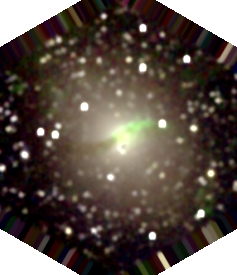

In [5]:
name1='lvmMap-NAME_OIII.fits.gz'.replace('NAME',nameF1)
name2='lvmMap-NAME_HI.fits.gz'.replace('NAME',nameF1)
name3='lvmMap-NAME_SII.fits.gz'.replace('NAME',nameF1)
nameT='lvmMap-NAME_OHS'.replace('NAME',nameF1)

Rmax=18.5 #Magnitudes AB RED Chanel
Rmin=24.5 #Magnitudes AB RED Chanel
Gmax=18.5 #Magnitudes AB GREEN Chanel
Gmin=24.1 #Magnitudes AB GREEN Chanel
Bmax=18.5 #Magnitudes AB BLUE Chanel
Bmin=24.6 #Magnitudes AB BLUE Chanel
valTs=[[Rmax,Rmin],[Gmax,Gmin],[Bmax,Bmin]]
get_jpg(name1,name2,name3,dir1=out_path,dir0=out_path,valTs=valTs,name=nameT)
Image(filename=out_path+'/'+nameT+'.jpeg')

In [16]:
psf=2.66*0.5
deconvolve_2dfile(path=out_path,name=nameF1+'_OIII',psf_x=psf,psf_y=psf)
deconvolve_2dfile(path=out_path,name=nameF1+'_SII',psf_x=psf,psf_y=psf)
deconvolve_2dfile(path=out_path,name=nameF1+'_HI',psf_x=psf,psf_y=psf)

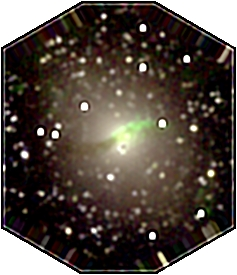

In [17]:
name1='lvmMap-NAME_OIII_decv.fits.gz'.replace('NAME',nameF1)
name2='lvmMap-NAME_HI_decv.fits.gz'.replace('NAME',nameF1)
name3='lvmMap-NAME_SII_decv.fits.gz'.replace('NAME',nameF1)
nameT='lvmMap-NAME_OHS_decv'.replace('NAME',nameF1)

Rmax=18.5 #Magnitudes AB RED Chanel
Rmin=24.5 #Magnitudes AB RED Chanel
Gmax=18.5 #Magnitudes AB GREEN Chanel
Gmin=24.1 #Magnitudes AB GREEN Chanel
Bmax=18.5 #Magnitudes AB BLUE Chanel
Bmin=24.6 #Magnitudes AB BLUE Chanel
valTs=[[Rmax,Rmin],[Gmax,Gmin],[Bmax,Bmin]]
get_jpg(name1,name2,name3,dir1=out_path,dir0=out_path,valTs=valTs,name=nameT)
Image(filename=out_path+'/'+nameT+'.jpeg')